In [5]:
import os
import scipy
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
! wget -O esm_resid_importances_all_proteins.npz https://zenodo.org/records/14080821/files/esm2_650m_residue_importances.npz?download=1

--2025-03-12 16:18:14--  https://zenodo.org/records/14080821/files/esm2_650m_residue_importances.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125007594 (119M) [application/octet-stream]
Saving to: ‘esm_resid_importances_all_proteins.npz’

100%[======================================>] 125,007,594 7.34MB/s   in 22s    

2025-03-12 16:18:37 (5.32 MB/s) - ‘esm_resid_importances_all_proteins.npz’ saved [125007594/125007594]



In [9]:
! wget -O protbert_resid_importances_all_proteins.npz https://zenodo.org/records/14080821/files/protbert_residue_importances.npz?download=1

--2025-03-12 16:17:17--  https://zenodo.org/records/14080821/files/protbert_residue_importances.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115197882 (110M) [application/octet-stream]
Saving to: ‘protbert_resid_importances_all_proteins.npz’

100%[======================================>] 115,197,882 4.09MB/s   in 25s    

2025-03-12 16:17:42 (4.39 MB/s) - ‘protbert_resid_importances_all_proteins.npz’ saved [115197882/115197882]



In [19]:
esm_all_proteins = np.load('esm_resid_importances_all_proteins.npz')

In [17]:
protbert_all_proteins = np.load('protbert_resid_importances_all_proteins.npz')

# PLOTS

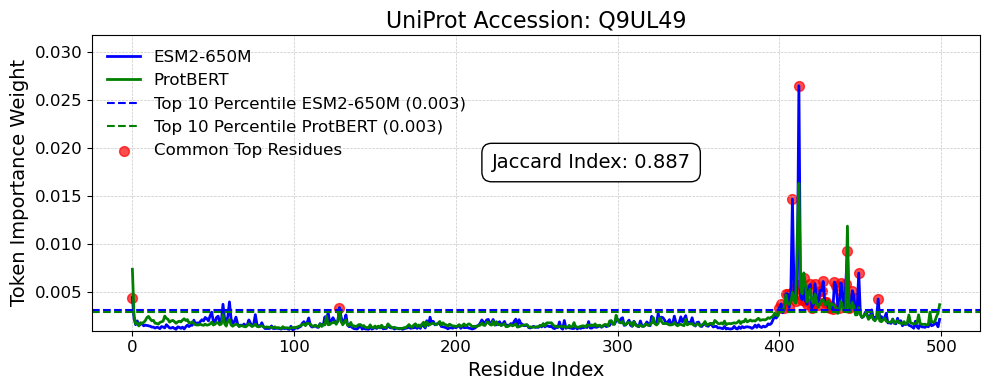

In [61]:
index = 4379
percentile = 10
save = True

fig_no = 303

protein_acc = list(esm_all_proteins.keys())[index]
fig_name = f"figs/Fig#{fig_no}#PLM_pool_parti_alignment_for_{protein_acc}_{percentile}percentile.png"

# Load data
esm_importances = esm_all_proteins[protein_acc]
protbert_importances = protbert_all_proteins[protein_acc]

# Calculate the 25th percentile for each dataset
esm_percentile = np.percentile(esm_importances, 100-percentile)
protbert_percentile = np.percentile(protbert_importances, 100-percentile)

# Plotting
# Identify residues above the percentile threshold for each model
esm_above_threshold = set(np.where(esm_importances >= esm_percentile)[0])
protbert_above_threshold = set(np.where(protbert_importances >= protbert_percentile)[0])

# Compute Jaccard Index
intersection = len(esm_above_threshold & protbert_above_threshold)
union = len(esm_above_threshold | protbert_above_threshold)
jaccard_index = intersection / union if union > 0 else 0.0

# Plot importance weights
plt.figure(figsize=(10, 4))
plt.plot(esm_importances, label='ESM2-650M', linewidth=2, color='blue')
plt.plot(protbert_importances, label='ProtBERT', linewidth=2, color='green')

# Dashed horizontal lines for top percentile thresholds
plt.axhline(y=esm_percentile, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Top {percentile} Percentile ESM2-650M ({esm_percentile:.3f})')
plt.axhline(y=protbert_percentile, color='green', linestyle='--', linewidth=1.5, 
            label=f'Top {percentile} Percentile ProtBERT ({protbert_percentile:.3f})')

# Highlight overlapping residues (Jaccard intersection) with scatter points
overlapping_residues = list(esm_above_threshold & protbert_above_threshold)
plt.scatter(overlapping_residues, [esm_importances[i] for i in overlapping_residues], 
            color='red', s=50, label='Common Top Residues', alpha=0.7)

# Add Jaccard Index as text annotation on the plot
plt.text(0.45, 0.55, f'Jaccard Index: {jaccard_index:.3f}', 
         fontsize=14, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Customize legend
#plt.legend(fontsize=12, loc='upper right', frameon=False)
plt.legend(fontsize=12, frameon=False)

# Title and axis labels
plt.title(f"UniProt Accession: {protein_acc}", fontsize=16, pad=5)
plt.xlabel("Residue Index", fontsize=14)
plt.ylabel("Token Importance Weight", fontsize=14)

# Adjust y-limits
ymin = min(np.min(esm_importances), np.min(protbert_importances))
ymax = max(np.max(esm_importances), np.max(protbert_importances))
plt.ylim([0.9*ymin, 1.2*ymax])

# Gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
if save:
    plt.savefig(fig_name, dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()


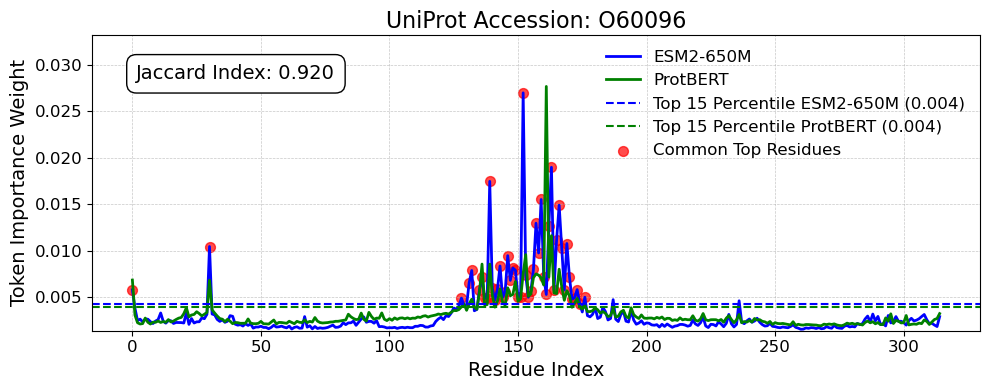

In [62]:
index = 21782 
percentile = 15
save = True
fig_no = 304
protein_acc = list(esm_all_proteins.keys())[index]
fig_name = f"figs/Fig#{fig_no}#PLM_pool_parti_alignment_for_{protein_acc}_{percentile}percentile.png"

# Load data
esm_importances = esm_all_proteins[protein_acc]
protbert_importances = protbert_all_proteins[protein_acc]

# Calculate the 25th percentile for each dataset
esm_percentile = np.percentile(esm_importances, 100-percentile)
protbert_percentile = np.percentile(protbert_importances, 100-percentile)

# Plotting
# Identify residues above the percentile threshold for each model
esm_above_threshold = set(np.where(esm_importances >= esm_percentile)[0])
protbert_above_threshold = set(np.where(protbert_importances >= protbert_percentile)[0])

# Compute Jaccard Index
intersection = len(esm_above_threshold & protbert_above_threshold)
union = len(esm_above_threshold | protbert_above_threshold)
jaccard_index = intersection / union if union > 0 else 0.0

# Plot importance weights
plt.figure(figsize=(10, 4))
plt.plot(esm_importances, label='ESM2-650M', linewidth=2, color='blue')
plt.plot(protbert_importances, label='ProtBERT', linewidth=2, color='green')

# Dashed horizontal lines for top percentile thresholds
plt.axhline(y=esm_percentile, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Top {percentile} Percentile ESM2-650M ({esm_percentile:.3f})')
plt.axhline(y=protbert_percentile, color='green', linestyle='--', linewidth=1.5, 
            label=f'Top {percentile} Percentile ProtBERT ({protbert_percentile:.3f})')

# Highlight overlapping residues (Jaccard intersection) with scatter points
overlapping_residues = list(esm_above_threshold & protbert_above_threshold)
plt.scatter(overlapping_residues, [esm_importances[i] for i in overlapping_residues], 
            color='red', s=50, label='Common Top Residues', alpha=0.7)

# Add Jaccard Index as text annotation on the plot
plt.text(0.05, 0.85, f'Jaccard Index: {jaccard_index:.3f}', 
         fontsize=14, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Customize legend
plt.legend(fontsize=12, loc='upper right', frameon=False)

# Title and axis labels
plt.title(f"UniProt Accession: {protein_acc}", fontsize=16, pad=5)
plt.xlabel("Residue Index", fontsize=14)
plt.ylabel("Token Importance Weight", fontsize=14)

# Adjust y-limits
ymin = min(np.min(esm_importances), np.min(protbert_importances))
ymax = max(np.max(esm_importances), np.max(protbert_importances))
plt.ylim([0.9*ymin, 1.2*ymax])

# Gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
if save:
    plt.savefig(fig_name, dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()


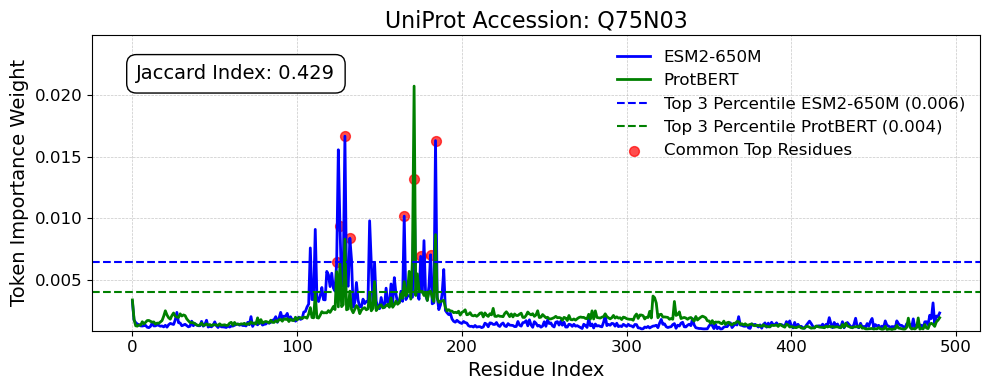

In [63]:
save=True

index = 11
percentile = 3

fig_no = 305
protein_acc = list(esm_all_proteins.keys())[index]
fig_name = f"figs/Fig#{fig_no}#PLM_pool_parti_alignment_for_{protein_acc}_{percentile}percentile.png"

# Load data
esm_importances = esm_all_proteins[protein_acc]
protbert_importances = protbert_all_proteins[protein_acc]

# Calculate the 25th percentile for each dataset
esm_percentile = np.percentile(esm_importances, 100-percentile)
protbert_percentile = np.percentile(protbert_importances, 100-percentile)

# Plotting
# Identify residues above the percentile threshold for each model
esm_above_threshold = set(np.where(esm_importances >= esm_percentile)[0])
protbert_above_threshold = set(np.where(protbert_importances >= protbert_percentile)[0])

# Compute Jaccard Index
intersection = len(esm_above_threshold & protbert_above_threshold)
union = len(esm_above_threshold | protbert_above_threshold)
jaccard_index = intersection / union if union > 0 else 0.0

# Plot importance weights
plt.figure(figsize=(10, 4))
plt.plot(esm_importances, label='ESM2-650M', linewidth=2, color='blue')
plt.plot(protbert_importances, label='ProtBERT', linewidth=2, color='green')

# Dashed horizontal lines for top percentile thresholds
plt.axhline(y=esm_percentile, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Top {percentile} Percentile ESM2-650M ({esm_percentile:.3f})')
plt.axhline(y=protbert_percentile, color='green', linestyle='--', linewidth=1.5, 
            label=f'Top {percentile} Percentile ProtBERT ({protbert_percentile:.3f})')

# Highlight overlapping residues (Jaccard intersection) with scatter points
overlapping_residues = list(esm_above_threshold & protbert_above_threshold)
plt.scatter(overlapping_residues, [esm_importances[i] for i in overlapping_residues], 
            color='red', s=50, label='Common Top Residues', alpha=0.7)

# Add Jaccard Index as text annotation on the plot
plt.text(0.05, 0.85, f'Jaccard Index: {jaccard_index:.3f}', 
         fontsize=14, transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Customize legend
plt.legend(fontsize=12, loc='upper right', frameon=False)

# Title and axis labels
plt.title(f"UniProt Accession: {protein_acc}", fontsize=16, pad=5)
plt.xlabel("Residue Index", fontsize=14)
plt.ylabel("Token Importance Weight", fontsize=14)

# Adjust y-limits
ymin = min(np.min(esm_importances), np.min(protbert_importances))
ymax = max(np.max(esm_importances), np.max(protbert_importances))
plt.ylim([0.9*ymin, 1.2*ymax])

# Gridlines
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Tick sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout and save the figure
plt.tight_layout()
if save:
    plt.savefig(fig_name, dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()
